# SVM without descriptors

In [1]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import numpy as np
from tdc.single_pred import Tox
from rdkit import Chem, DataStructs
from rdkit.Chem import PandasTools, AllChem
import pandas as pd
from sklearn.dummy import DummyRegressor
from sklearn.metrics import explained_variance_score, max_error, \
                     mean_absolute_error, mean_squared_error, r2_score

In [2]:
data = Tox(name='LD50_Zhu').get_data()

Found local copy...
Loading...
Done!


In [3]:
data

,Drug_ID,Drug,Y
0,"Diazene, diphenyl-, 1-oxide",[O-][N+](=Nc1ccccc1)c1ccccc1,2.505
1,"Methane, tribromo-",BrC(Br)Br,2.343
2,Bromoethene (9CI),C=CBr,2.330
3,"1,1'-Biphenyl, hexabromo-",Brc1ccc(-c2ccc(Br)c(Br)c2Br)c(Br)c1Br,1.465
4,"Isothiocyanic acid, p-bromophenyl ester",S=C=Nc1ccc(Br)cc1,2.729
...,...,...,...
7380,"Isocyanic acid, (alpha,alpha,alpha-trifluoro-o...",O=C=Nc1ccccc1C(F)(F)F,1.427
7381,"1,3-Benzenediamine, 4-(1,1,2,2-tetrafluoroetho...",Nc1ccc(OC(F)(F)C(F)F)c(N)c1,2.321
7382,"Propanenitrile, 3-((2-(acetyloxy)ethyl)phenyla...",CC(=O)OCCN(CCC#N)c1ccccc1,2.050
7383,"IH-Indene-1,3(2H)-dione, 2-(2-methyl-1-(2-(1-p...",CC1=CC(=C2C(=O)c3ccccc3C2=O)C=CN1CCN1CCCCC1,2.951


In [4]:
PandasTools.AddMoleculeColumnToFrame(data,'Drug','Molecule')
if data.Molecule.isna().sum() == 0:
    print('Smiles loaded')

Smiles loaded


,Drug_ID,Drug,Y,Molecule
1003,"Hexanal, 3-ethoxy-, diethyl acetal",CCCC(CC(OCC)OCC)OCC,1.109,
2792,"Ether, 2-chloro-alpha,alpha,alpha-trifluoro-p-...",O=[N+]([O-])c1ccc(Oc2ccc(C(F)(F)F)cc2Cl)cc1,2.502,
1952,"3-Azabicyclo(3.1.0)hexane-2,4-dione, 1-(4-chlo...",O=C1NC(=O)C2(c3ccc(Cl)cc3)CC12,2.155,

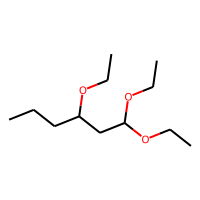
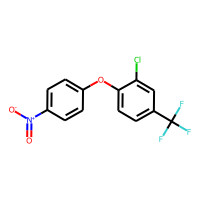
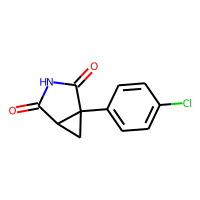

In [5]:
data.sample(3)

# And again, the descriptors didn’t improve the accuracy, so I removed them

In [6]:
def MorganFP(mol):
    fp = AllChem.GetHashedMorganFingerprint(mol, 2, nBits=4096)
    #fp = AllChem.GetMorganFingerprintAsBitVect(mol,2,nBits=4096)
    ar = np.zeros((1,), dtype=np.int8)
    DataStructs.ConvertToNumpyArray(fp, ar)
    
    """
    d = [
        Descriptors.MolLogP(mol),
        Descriptors.MolMR(mol), 
        Descriptors.MolWt(mol),
        Descriptors.ExactMolWt(mol),
        Descriptors.BalabanJ(mol), 
        Descriptors.NumHAcceptors(mol),
        Descriptors.NumHDonors(mol),
        Descriptors.NumValenceElectrons(mol),
        Descriptors.HeavyAtomCount(mol),
        Descriptors.HeavyAtomMolWt(mol),
        Descriptors.TPSA(mol),
        Descriptors.FpDensityMorgan1(mol),
        Descriptors.FpDensityMorgan2(mol),
        Descriptors.FpDensityMorgan3(mol),
        Descriptors.MaxAbsPartialCharge(mol),
        Descriptors.MaxPartialCharge(mol),
        Descriptors.MinAbsPartialCharge(mol),
        Descriptors.MinPartialCharge(mol),
        Descriptors.NumRadicalElectrons(mol),
        Descriptors.NumValenceElectrons(mol),
        rdMolDescriptors.CalcChi0n(mol),
        rdMolDescriptors.CalcChi0v(mol),
        rdMolDescriptors.CalcChi1n(mol),
        rdMolDescriptors.CalcChi1v(mol),
        rdMolDescriptors.CalcChi2n(mol),
        rdMolDescriptors.CalcChi2v(mol),
        rdMolDescriptors.CalcChi3n(mol),
        rdMolDescriptors.CalcChi3v(mol),
        rdMolDescriptors.CalcChi4n(mol),
        rdMolDescriptors.CalcChi4v(mol),
        rdMolDescriptors.CalcKappa1(mol),
        rdMolDescriptors.CalcKappa2(mol),
        rdMolDescriptors.CalcKappa3(mol),
        rdMolDescriptors.CalcLabuteASA(mol),
        # and others https://www.rdkit.org/docs/source/rdkit.Chem.rdMolDescriptors.html
        ]
    
    ar2 = np.asarray(d, dtype=np.float32)
    #ar2 = np.array(d)
    
    return np.concatenate((ar, ar2))
    """
    return ar

In [7]:
data["Morgan_FP"] = data.Molecule.apply(MorganFP)

,Drug_ID,Drug,Y,Molecule,Morgan_FP
5738,"Benzenamine, 2,4-dichloro-",Nc1ccc(Cl)cc1Cl,2.005,,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."

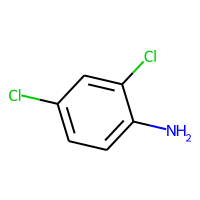

In [8]:
data.sample(1)

In [9]:
X = np.stack(data.Morgan_FP.values)
print(X.shape)

(7385, 4096)


In [10]:
y = data.Y.values.reshape((-1,1))
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=42)

In [11]:
scaler = StandardScaler()
y_train = scaler.fit_transform(y_train)
y_test = scaler.transform(y_test)

In [12]:
from sklearn.feature_selection import VarianceThreshold
feature_select = VarianceThreshold(threshold=0.05)
X_train = feature_select.fit_transform(X_train)
X_test = feature_select.transform(X_test)
X_train.shape

(6646, 159)

In [15]:
from sklearn.svm import SVR
from sklearn.model_selection import RandomizedSearchCV

regr = SVR()
parameters = {'C' : [1.0, 0.1, 0.01, 0.001],
              'epsilon':[1.0, 0.1, 0.01, 0.001] }
randomized_search_model = RandomizedSearchCV(regr, parameters, n_iter=20, cv=5, verbose=1, scoring='neg_mean_squared_error')

In [16]:
randomized_search_model.fit(X_train, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


RandomizedSearchCV(cv=5, estimator=SVR(), n_iter=20,
                   param_distributions={'C': [1.0, 0.1, 0.01, 0.001],
                                        'epsilon': [1.0, 0.1, 0.01, 0.001]},
                   scoring='neg_mean_squared_error', verbose=1)

In [17]:
pd.DataFrame(randomized_search_model.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_epsilon,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.940829,0.046707,0.313913,0.028718,1.0,1.0,"{'epsilon': 1.0, 'C': 1.0}",-0.587619,-0.582769,-0.584036,-0.583647,-0.526175,-0.572849,0.023396,4
1,4.394728,0.111542,1.683503,0.061498,0.1,1.0,"{'epsilon': 0.1, 'C': 1.0}",-0.510577,-0.500299,-0.507378,-0.517462,-0.443295,-0.495802,0.026828,1
2,5.034691,0.098702,1.945486,0.031571,0.01,1.0,"{'epsilon': 0.01, 'C': 1.0}",-0.514261,-0.505963,-0.509290,-0.520007,-0.442872,-0.498479,0.028205,2
3,5.240824,0.159232,2.081734,0.106927,0.001,1.0,"{'epsilon': 0.001, 'C': 1.0}",-0.514729,-0.506400,-0.509362,-0.520119,-0.443053,-0.498732,0.028232,3
4,1.060054,0.025729,0.379615,0.016551,1.0,0.1,"{'epsilon': 1.0, 'C': 0.1}",-0.737718,-0.711363,-0.697214,-0.733535,-0.654400,-0.706846,0.030097,8
5,4.520476,0.121430,1.850718,0.044149,0.1,0.1,"{'epsilon': 0.1, 'C': 0.1}",-0.667154,-0.638571,-0.614197,-0.676519,-0.568152,-0.632919,0.039116,5
6,5.004652,0.163788,2.045310,0.046948,0.01,0.1,"{'epsilon': 0.01, 'C': 0.1}",-0.670180,-0.643425,-0.615251,-0.679659,-0.572741,-0.636251,0.038888,7
7,5.012028,0.103396,2.079554,0.038861,0.001,0.1,"{'epsilon': 0.001, 'C': 0.1}",-0.669824,-0.643065,-0.614856,-0.680058,-0.572830,-0.636127,0.038917,6
8,1.329467,0.063993,0.474378,0.026335,1.0,0.01,"{'epsilon': 1.0, 'C': 0.01}",-0.926204,-0.886886,-0.857636,-0.929233,-0.834972,-0.886986,0.037121,12
9,4.542664,0.122577,1.875969,0.072839,0.1,0.01,"{'epsilon': 0.1, 'C': 0.01}",-0.910714,-0.861809,-0.810903,-0.936269,-0.795431,-0.863025,0.054637,9


In [18]:
model = randomized_search_model.best_estimator_

In [19]:
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

In [20]:
y_true = y_test
y_pred = y_pred_test

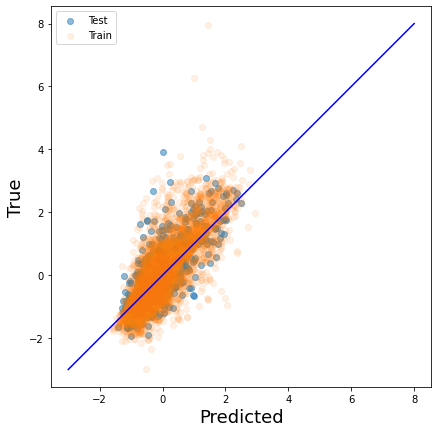

In [21]:
plt.scatter(y_pred_test, y_test, alpha=0.5, label="Test")
plt.scatter(y_pred_train, y_train, alpha=0.1, label="Train")
plt.legend()
plt.plot([-3, 8], [-3,8], c="b")
plt.xlabel('Predicted', fontsize=18)
plt.ylabel('True', fontsize=18)
plt.axis('square')
fig = plt.gcf()
fig.set_size_inches(7, 7)

# Predict for single molecule

In [23]:
n = 156
X_test[n]

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0,
       0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 2, 2, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 2, 0, 0,
       4, 0, 0, 0, 0], dtype=int8)

In [24]:
y_test[n]

array([1.28553456])

In [25]:
model.predict(X_test[n].reshape(1, -1))

array([1.13782945])

# Model assessment

In [26]:
def assess_model(y_true, y_pred, X_train, y_train):

    def calc_metrics(y_pred):
        score1 = max_error(y_true, y_pred)
        score2 = mean_absolute_error(y_true, y_pred)
        score3 = mean_squared_error(y_true, y_pred)
        score4 = explained_variance_score(y_true, y_pred)
        score5 = r2_score(y_true, y_pred)
        return score1,score2,score3,score4,score5

    dummy1 = DummyRegressor(strategy="mean")
    dummy1.fit(X_train, y_train)
    dummy_mean = dummy1.predict(X_test)

    dummy2 = DummyRegressor(strategy="median")
    dummy2.fit(X_train, y_train)
    dummy_median = dummy2.predict(X_test)

    dummy3 = DummyRegressor(strategy="quantile", quantile=0.0)
    dummy3.fit(X_train, y_train)
    dummy_quantile00 = dummy3.predict(X_test)

    dummy4 = DummyRegressor(strategy="quantile", quantile=0.5)
    dummy4.fit(X_train, y_train)
    dummy_quantile05 = dummy4.predict(X_test)

    dummy5 = DummyRegressor(strategy="quantile", quantile=1.0)
    dummy5.fit(X_train, y_train)
    dummy_quantile10 = dummy5.predict(X_test)
    
    results = [
        calc_metrics(y_pred),
        calc_metrics(dummy_mean),
        calc_metrics(dummy_median),
        calc_metrics(dummy_quantile00),
        calc_metrics(dummy_quantile05),
        calc_metrics(dummy_quantile10)
    ]

    df = pd.DataFrame(results).T 

    df.columns = ['Model', 'dummy(Mean)', 'dummy(Median)', 
                  'dummy(Min Quantile)', 'dummy(Median Quantile)', 
                  'dummy(Max Quantile)']

    df = df.rename(index={0: "max error", 1: "MAE", 2: "MSE", 3:"explained", 4:"r2"})
    pd.set_option('display.float_format', lambda x: '%.3f' % x)
    df = df.T

    def highlight_max(data, color='lightgreen'):
        attr = 'background-color: {}'.format(color)
        if data.ndim == 1:  
            is_max = data == data.max()
            return [attr if v else '' for v in is_max]

    def highlight_min(data, color='lightgreen'):
        attr = 'background-color: {}'.format(color)
        if data.ndim == 1:  
            is_min = data == data.min()
            return [attr if v else '' for v in is_min]


    return df.style.apply(highlight_min, subset=['max error', 'MAE', 'MSE']).\
             apply(highlight_max, subset=['explained', 'r2'])

In [27]:
print("\n"+"SVM()")
assess_model(y_true, y_pred, X_train, y_train)


SVM()


,max error,MAE,MSE,explained,r2
Model,3.911530,0.457549,0.389836,0.564348,0.558950
dummy(Mean),3.924159,0.742618,0.885747,0.000000,-0.002110
dummy(Median),4.106774,0.718489,0.903324,0.000000,-0.021996
dummy(Min Quantile),6.923277,2.955937,9.621446,0.000000,-9.885441
dummy(Median Quantile),4.106774,0.718489,0.903324,0.000000,-0.021996
dummy(Max Quantile),9.869948,7.986470,64.667592,0.000000,-72.163151


# This time the results were not as successful, but better than the dummy models. Fine-tuning may improve results.